In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
   


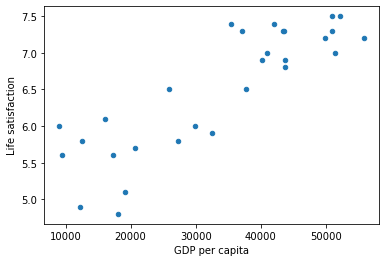

[[5.96242338]] (190, 6)


In [ ]:
import os
datapath = os.path.join("datasets", "lifesat", "")

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats["GDP per capita"].shape

X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

# Visualize
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, Y)

# Prediction
X_new = [[22587]]
print(model.predict(X_new), gdp_per_capita.shape)


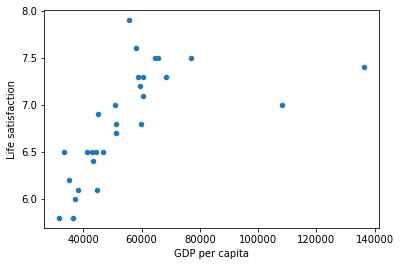

[[7.29715087]]


In [6]:
# Load the data
oecd_bli = pd.read_csv(datapath + "bli2021.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp2021.csv",thousands=',',delimiter=',', na_values="n/a")



def prepare_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="LOCATION", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"Value": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("LOCATION", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]
    
country_stats = prepare_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

# Visualize
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, Y)

# Make a prediction for Switzerland
X_new = [[85681.97]]
print(model.predict(X_new))


In [9]:
# using k-Nearest Neighbors
import sklearn.neighbors

model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

model.fit(X, Y)

# Make a prediction for Switzerland
X_new = [[85681.97]]

print(model.predict(X_new))

[[7.43333333]]
